## Task 1: Working with a dataset with categorical features

#### Step 1: Reading the data

Firstly, we should read the data from both training dataset and testing dataset.

In [1]:
import pandas as pd

train_data = pd.read_csv('adult_train.csv') 
test_data = pd.read_csv('adult_test.csv')    
X_train = train_data.drop(columns=['target'])  
y_train = train_data['target']                

X_test = test_data.drop(columns=['target'])    
y_test = test_data['target']                   

print("X_train:")
print(X_train.head())
print("\n y_train:")
print(y_train.head())
print("\n X_test:")
print(X_test.head())
print("\n y_test:")
print(y_test.head())

X_train:
   age workclass     education  education-num      marital-status  \
0   27   Private  Some-college             10            Divorced   
1   27   Private     Bachelors             13       Never-married   
2   25   Private    Assoc-acdm             12  Married-civ-spouse   
3   46   Private       5th-6th              3  Married-civ-spouse   
4   45   Private          11th              7            Divorced   

         occupation   relationship                race     sex  capital-gain  \
0      Adm-clerical      Unmarried               White  Female             0   
1    Prof-specialty  Not-in-family               White  Female             0   
2             Sales        Husband               White    Male             0   
3  Transport-moving        Husband  Amer-Indian-Eskimo    Male             0   
4  Transport-moving  Not-in-family               White    Male             0   

   capital-loss  hours-per-week native-country  
0             0              44  United-States

#### Task 2: Encoding the features as numbers.

In [2]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

dicts_for_train = X_train.to_dict('records')
dicts_for_test = X_test.to_dict('records')

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_for_train)
X_test_encoded = dv.transform(dicts_for_test)

print(f"Training: {X_train_encoded.shape}")
print(f"Testing: {X_test_encoded.shape}")

Training: (32561, 107)
Testing: (16281, 107)


#### Step 3: Combining the steps

Then we could define the step to simply the process.

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier()
)

pipeline.fit(dicts_for_train, y_train)
y_pre = pipeline.predict(dicts_for_test)
accuracy = accuracy_score(y_test, y_pre)
print(f"The accuracy of this model is: {accuracy:.4f}")

The accuracy of this model is: 0.8177


## Task 2: Decision trees and random forests
### 2.1 Underfitting and overfitting in decision tree classifiers.
In this part, we will train `DecisionTreeClassifier` on the given dataset. The evaluation metric we pick is the `Gini index`

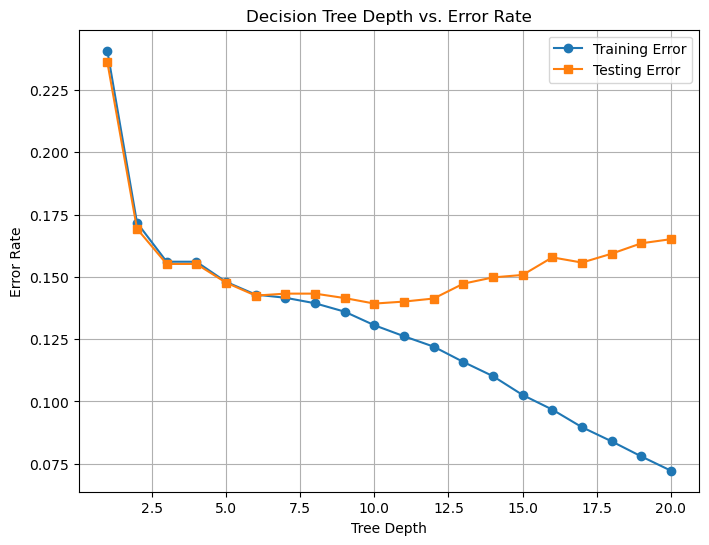

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# record train/test errors given depth of trees
train_errors = []
test_errors = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=114514)
    clf.fit(X_train_encoded, y_train)
    
    # E_train
    train_pred = clf.predict(X_train_encoded)
    # E_test
    test_pred = clf.predict(X_test_encoded)
    
    train_errors.append(1 - accuracy_score(y_train, train_pred))
    test_errors.append(1 - accuracy_score(y_test, test_pred))

# plot error-depth relation
plt.figure(figsize=(8, 6))
plt.plot(depths, train_errors, label='Training Error', marker='o')
plt.plot(depths, test_errors, label='Testing Error', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Error Rate')
plt.title('Decision Tree Depth vs. Error Rate')
plt.legend()
plt.grid()
plt.show()


### 2.2 Underfitting and overfitting in random forest classifiers.

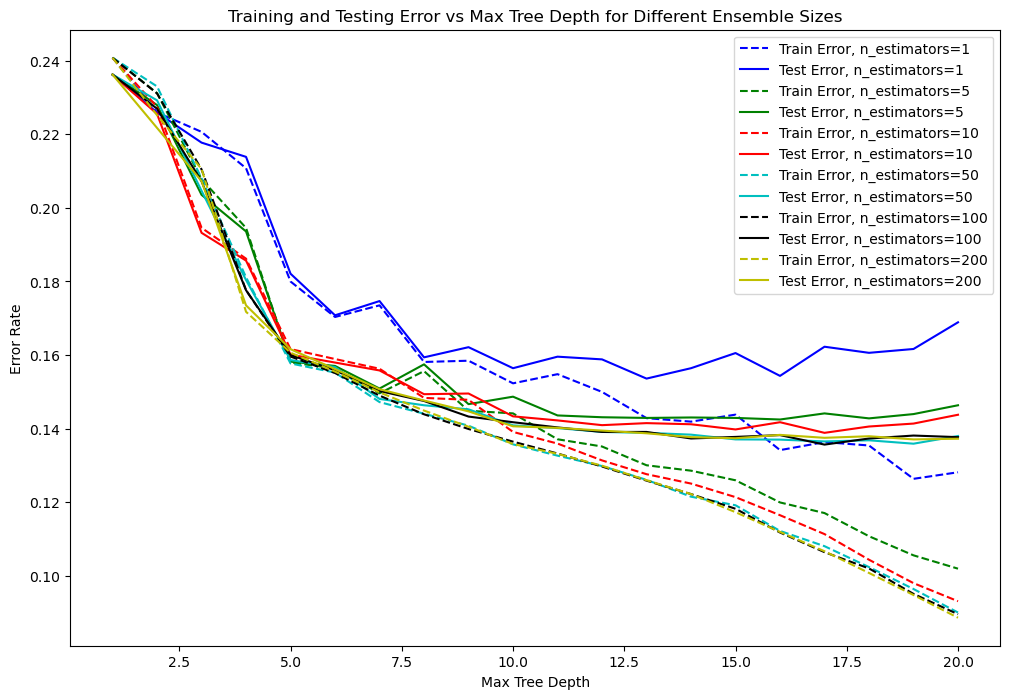

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test = X_train_encoded, X_test_encoded

tree_depths = range(1, 21)
# ensemble size
n_estimators_list = [1, 5, 10, 50, 100, 200]
colors = ['b', 'g', 'r', 'c', 'k', 'y']

plt.figure(figsize=(12, 8))

# record errors
for (n_estimators, color) in zip(n_estimators_list, colors):
    train_errors = []
    test_errors = []
    
    for depth in tree_depths:
        # train
        clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, criterion='gini', random_state=1919810, n_jobs=-1)
        clf.fit(X_train, y_train)
        
        # calculate errors
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    # plot error-depth relationshjp for given ensemble size
    plt.plot(tree_depths, train_errors, label=f'Train Error, n_estimators={n_estimators}', linestyle='dashed', color=color)
    plt.plot(tree_depths, test_errors, label=f'Test Error, n_estimators={n_estimators}', color=color)

plt.xlabel('Max Tree Depth')
plt.ylabel('Error Rate')
plt.title('Training and Testing Error vs Max Tree Depth for Different Ensemble Sizes')
plt.legend()
plt.show()


### 2.3 Discussion

#### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?

The error curves of random forest with ensemble size 1 have bigger bias (E_train ^ 1/2) then those of decision tree.

This is caused by bagging (both data and feature bagging). In random forest, the real training data is randomly sampled from the trainning set WITH REPLACEMENT, meaning that there could be some data points missing in the real training data. Moreover, the selected features are also subsets of all the features, thus when n is small, some features may not be trained adequately. Therefore, the acurracy of predicting on the training data is much lower. This leads to higher bias (or to say E_train)

#### What happens with the curve for random forests as the ensemble size grows?

As the ensemble size grows, the variance is decreasing, given the same max depth of trees. This manifest that bagging is useful for lowering variance by adding randomness and averaging.

When the ensemble size is small (like 1 and 5 in the graph), as the ensemble size grows, the bias is also decreasing. The reason is stated in the previos question. However, as the ensemble size continues to grow, the bias remains relatively low, since the sampling is enough to cover all the training data/features.

#### What happens with the best observed test set accuracy as the ensemble size grows?

As the ensemble size grows, the best observed test set accuracy generally appears at bigger max depth of trees, indicating that bagging benefits the generalization ability of complex models.

#### What happens with the training time as the ensemble size grows?

As the ensemble size grows, the training time is growing propotionally, since every single tree has the same algorithm and same amount of data to train.